In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retailtab/Creating Database.csv


In [2]:
import pandas as pd
import numpy as np

# Reading the table and declaring a dataframe df

In [3]:
df = pd.read_csv('/kaggle/input/retailtab/Creating Database.csv')
df

,DAY_OF_WEEK,MONTH_NAME,MONTH_PERIOD,TOTAL_REVENUE,ORDER_COUNT,QUANTITY,CUSTOMER_NAME,PRODUCT_CATEGORY
0,Fri,8,Month Start,450,1,3,Lerato,Beverages
1,Sat,8,Month Start,151,1,2,Thabo,Snacks
2,Mon,8,Other,50,1,1,Kabelo,Beverages
3,Sun,8,Month Start,1000,1,5,Naledi,Bakery


# Exploring the information about my table

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DAY_OF_WEEK       4 non-null      object
 1   MONTH_NAME        4 non-null      int64 
 2   MONTH_PERIOD      4 non-null      object
 3   TOTAL_REVENUE     4 non-null      int64 
 4   ORDER_COUNT       4 non-null      int64 
 5   QUANTITY          4 non-null      int64 
 6   CUSTOMER_NAME     4 non-null      object
 7   PRODUCT_CATEGORY  4 non-null      object
dtypes: int64(4), object(4)
memory usage: 388.0+ bytes


# Counting categories within Month Period

In [5]:
df.value_counts('MONTH_PERIOD')

MONTH_PERIOD
Month Start    3
Other          1
Name: count, dtype: int64

# Counting categories within Product Category 

In [6]:
df.value_counts('PRODUCT_CATEGORY')

PRODUCT_CATEGORY
Beverages    2
Bakery       1
Snacks       1
Name: count, dtype: int64

# Displaying the numerical fields

In [7]:
df.describe()

,MONTH_NAME,TOTAL_REVENUE,ORDER_COUNT,QUANTITY
count,4.0,4.000000,4.0,4.000000
mean,8.0,412.750000,1.0,2.750000
std,0.0,426.751587,0.0,1.707825
min,8.0,50.000000,1.0,1.000000
25%,8.0,125.750000,1.0,1.750000
50%,8.0,300.500000,1.0,2.500000
75%,8.0,587.500000,1.0,3.500000
max,8.0,1000.000000,1.0,5.000000


# Display first 2 rows of the table

In [8]:
df.head(2)

,DAY_OF_WEEK,MONTH_NAME,MONTH_PERIOD,TOTAL_REVENUE,ORDER_COUNT,QUANTITY,CUSTOMER_NAME,PRODUCT_CATEGORY
0,Fri,8,Month Start,450,1,3,Lerato,Beverages
1,Sat,8,Month Start,151,1,2,Thabo,Snacks


# Validating data types

In [9]:
df.dtypes

DAY_OF_WEEK         object
MONTH_NAME           int64
MONTH_PERIOD        object
TOTAL_REVENUE        int64
ORDER_COUNT          int64
QUANTITY             int64
CUSTOMER_NAME       object
PRODUCT_CATEGORY    object
dtype: object

In [10]:
df['TOTAL_REVENUE']=df['TOTAL_REVENUE'].astype(float)

In [11]:
df.dtypes

DAY_OF_WEEK          object
MONTH_NAME            int64
MONTH_PERIOD         object
TOTAL_REVENUE       float64
ORDER_COUNT           int64
QUANTITY              int64
CUSTOMER_NAME        object
PRODUCT_CATEGORY     object
dtype: object

In [12]:
df.head()

,DAY_OF_WEEK,MONTH_NAME,MONTH_PERIOD,TOTAL_REVENUE,ORDER_COUNT,QUANTITY,CUSTOMER_NAME,PRODUCT_CATEGORY
0,Fri,8,Month Start,450.0,1,3,Lerato,Beverages
1,Sat,8,Month Start,151.0,1,2,Thabo,Snacks
2,Mon,8,Other,50.0,1,1,Kabelo,Beverages
3,Sun,8,Month Start,1000.0,1,5,Naledi,Bakery


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


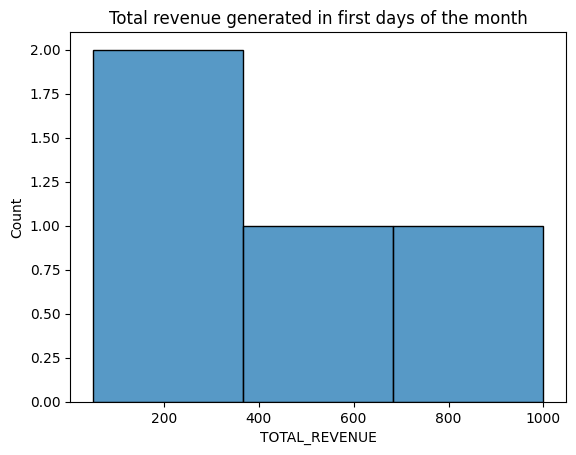

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x= 'TOTAL_REVENUE')
plt.title('Total revenue generated in first days of the month')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


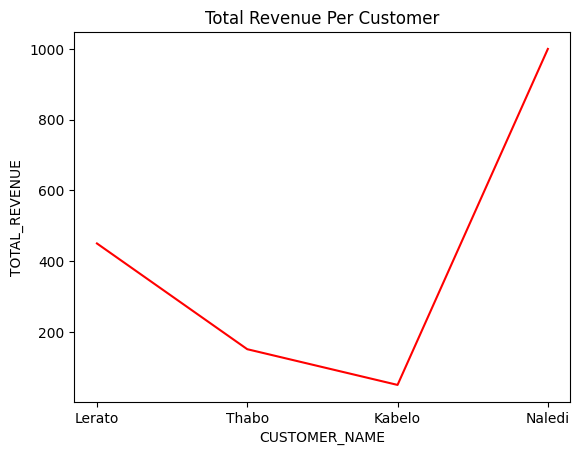

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df, x='CUSTOMER_NAME',y= 'TOTAL_REVENUE' , color='red')
plt.title('Total Revenue Per Customer')
plt.show()

# Minimum and Maximum Total Revenue

In [15]:
df['TOTAL_REVENUE'].min(),df['TOTAL_REVENUE'].max()

(50.0, 1000.0)

# Aggregation 

In [16]:
df[['TOTAL_REVENUE', 'QUANTITY']].agg(['mean','std','median'])

,TOTAL_REVENUE,QUANTITY
mean,412.750000,2.750000
std,426.751587,1.707825
median,300.500000,2.500000


# Dictionary using Aggregation 

In [17]:
df.agg({'TOTAL_REVENUE': ['mean'], 'QUANTITY': ['sum']})

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TOTAL_REVENUE,QUANTITY
mean,412.75,NaN
sum,NaN,11.0


# Using Named Aggregation

In [18]:
df.groupby('MONTH_PERIOD').agg(mean_QUANTITY=('QUANTITY','mean'), std_TOTAL_REVENUE=('TOTAL_REVENUE','std'))

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,mean_QUANTITY,std_TOTAL_REVENUE
MONTH_PERIOD,,
Month Start,3.333333,430.639447
Other,1.000000,NaN


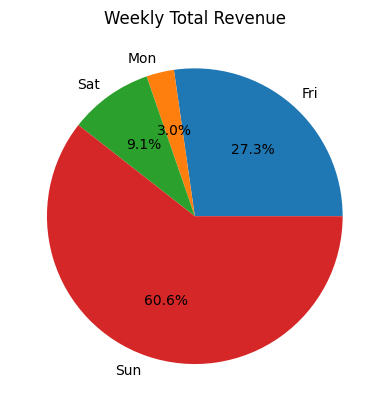

In [19]:
import matplotlib.pyplot as plt

day_revenue=df.groupby('DAY_OF_WEEK')['TOTAL_REVENUE'].sum()
labels = day_revenue.index
sizes = day_revenue.values
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title('Weekly Total Revenue')
plt.show()